In [1]:
import pandas as pd               
import numpy as np               
import matplotlib.pyplot as plt   
import seaborn as sns             

%matplotlib inline

In [2]:
import pandas as pd
data = pd.read_csv("Anastasia_Gorbunova_laptops.csv")
data

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,770.00


In [3]:
data.isnull().sum()

Unnamed: 0          0
Company             8
Product             8
TypeName            8
Inches              8
ScreenResolution    8
Cpu                 8
Ram                 8
Memory              8
Gpu                 8
OpSys               8
Weight              8
Price_euros         8
dtype: int64

In [4]:
data.isnull().sum()/len(data)

Unnamed: 0          0.00000
Company             0.00614
Product             0.00614
TypeName            0.00614
Inches              0.00614
ScreenResolution    0.00614
Cpu                 0.00614
Ram                 0.00614
Memory              0.00614
Gpu                 0.00614
OpSys               0.00614
Weight              0.00614
Price_euros         0.00614
dtype: float64

### Комментарий
А зачем нужно было удалять столько годных столбцов с информацией о технических характеристиках?

In [5]:
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('Product', axis=1)
data = data.drop('Cpu', axis=1)
data = data.drop('Gpu', axis=1)
data = data.drop('ScreenResolution', axis=1)
data = data.drop('Memory', axis=1)

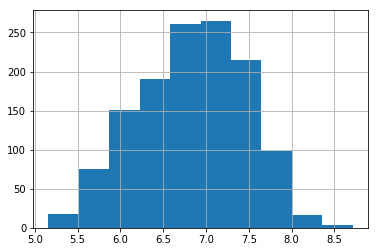

In [6]:
data['Price_euros'] = np.log(data['Price_euros'])
data.Price_euros.hist()

In [7]:
data['Inches'].fillna(data['Inches'].mean(), inplace = True)
data['Weight'].fillna(data['Weight'].mean(), inplace = True)
data['Price_euros'].fillna(data['Price_euros'].mean(), inplace = True)

In [8]:
data['TypeName'].value_counts().head(1)

Notebook    725
Name: TypeName, dtype: int64

In [9]:
data['TypeName'].fillna("Notebook", inplace = True)

In [10]:
len(data['TypeName'].unique())

6

In [11]:
dummies = pd.get_dummies(data['TypeName'], prefix='TypeName', drop_first=True)
data = pd.concat([data, dummies], axis=1)

In [12]:
data['Company'].value_counts().head(1)

Dell    297
Name: Company, dtype: int64

In [13]:
data['Company'].fillna("Lenovo", inplace = True)

In [14]:
len(data['Company'].unique())

19

In [15]:
dummies = pd.get_dummies(data['Company'], prefix='Company', drop_first=True)
data = pd.concat([data, dummies], axis=1)

In [16]:
data['Ram'].value_counts().head(1)

8GB    613
Name: Ram, dtype: int64

In [17]:
data['Ram'].fillna("8GB", inplace = True)

In [18]:
len(data['Ram'].unique())

9

In [19]:
dummies = pd.get_dummies(data['Ram'], prefix='Ram', drop_first=True)
data = pd.concat([data, dummies], axis=1)

In [20]:
data['OpSys'].value_counts().head(1)

Windows 10    1070
Name: OpSys, dtype: int64

In [21]:
data['OpSys'].fillna("Windows 10", inplace = True)

In [22]:
len(data['OpSys'].unique())

9

In [23]:
dummies = pd.get_dummies(data['OpSys'], prefix='OpSys', drop_first=True)
data = pd.concat([data, dummies], axis=1)

In [24]:
data.isnull().sum()

Company                 0
TypeName                0
Inches                  0
Ram                     0
OpSys                   0
Weight                  0
Price_euros             0
TypeName_Gaming         0
TypeName_Netbook        0
TypeName_Notebook       0
TypeName_Ultrabook      0
TypeName_Workstation    0
Company_Apple           0
Company_Asus            0
Company_Chuwi           0
Company_Dell            0
Company_Fujitsu         0
Company_Google          0
Company_HP              0
Company_Huawei          0
Company_LG              0
Company_Lenovo          0
Company_MSI             0
Company_Mediacom        0
Company_Microsoft       0
Company_Razer           0
Company_Samsung         0
Company_Toshiba         0
Company_Vero            0
Company_Xiaomi          0
Ram_16GB                0
Ram_24GB                0
Ram_2GB                 0
Ram_32GB                0
Ram_4GB                 0
Ram_64GB                0
Ram_6GB                 0
Ram_8GB                 0
OpSys_Chrome

In [25]:
data.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,...,Ram_6GB,Ram_8GB,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,Apple,Ultrabook,13.3,8GB,macOS,1.37,7.200194,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,Apple,Ultrabook,13.3,8GB,macOS,1.34,6.801216,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,HP,Notebook,15.6,8GB,No OS,1.86,6.354370,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,Apple,Ultrabook,15.4,16GB,macOS,1.83,7.838915,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Apple,Ultrabook,13.3,8GB,macOS,1.37,7.497540,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [26]:
target_var = 'Price_euros'  
categor_var = ['Company','TypeName','Ram','OpSys']  
contin_var = ['Weight','Inches'] 

In [27]:
data.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight',
       'Price_euros', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'Ram_16GB',
       'Ram_24GB', 'Ram_2GB', 'Ram_32GB', 'Ram_4GB', 'Ram_64GB', 'Ram_6GB',
       'Ram_8GB', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS'],
      dtype='object')

In [28]:
data_categor = data[categor_var]
data_categor.head()

,Company,TypeName,Ram,OpSys
0,Apple,Ultrabook,8GB,macOS
1,Apple,Ultrabook,8GB,macOS
2,HP,Notebook,8GB,No OS
3,Apple,Ultrabook,16GB,macOS
4,Apple,Ultrabook,8GB,macOS


In [29]:
data = pd.concat([data,data_categor], axis=1)
data.drop(categor_var, axis=1, inplace=True)
data.head()

,Inches,Weight,Price_euros,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Company_Apple,Company_Asus,...,Ram_6GB,Ram_8GB,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,1.37,7.200194,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,13.3,1.34,6.801216,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,15.6,1.86,6.354370,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,15.4,1.83,7.838915,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,13.3,1.37,7.497540,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 42 columns):
Inches                  1303 non-null float64
Weight                  1303 non-null float64
Price_euros             1303 non-null float64
TypeName_Gaming         1303 non-null uint8
TypeName_Netbook        1303 non-null uint8
TypeName_Notebook       1303 non-null uint8
TypeName_Ultrabook      1303 non-null uint8
TypeName_Workstation    1303 non-null uint8
Company_Apple           1303 non-null uint8
Company_Asus            1303 non-null uint8
Company_Chuwi           1303 non-null uint8
Company_Dell            1303 non-null uint8
Company_Fujitsu         1303 non-null uint8
Company_Google          1303 non-null uint8
Company_HP              1303 non-null uint8
Company_Huawei          1303 non-null uint8
Company_LG              1303 non-null uint8
Company_Lenovo          1303 non-null uint8
Company_MSI             1303 non-null uint8
Company_Mediacom        1303 non-null uint8
Company

In [31]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.3)

Price_euros_train = data_train['Price_euros']
Price_euros_test = data_test['Price_euros']

X_train = data_train.drop(['Price_euros'], axis=1)
X_test = data_test.drop(['Price_euros'], axis=1)

In [32]:
data_train.shape

(912, 42)

In [33]:
data_test.shape

(391, 42)

### Комментарий
Все-таки шкалировать имеет смысл только непрерывные переменные, категориальные не стоит

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(data_train[['Inches', 'Weight',
       'Price_euros', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'Ram_16GB',
       'Ram_24GB', 'Ram_2GB', 'Ram_32GB', 'Ram_4GB', 'Ram_64GB', 'Ram_6GB',
       'Ram_8GB', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS']]) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
data_train_scale = scaler.transform(data_train[['Inches', 'Weight',
       'Price_euros', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'Ram_16GB',
       'Ram_24GB', 'Ram_2GB', 'Ram_32GB', 'Ram_4GB', 'Ram_64GB', 'Ram_6GB',
       'Ram_8GB', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS']])
data_test_scale = scaler.transform(data_test[['Inches', 'Weight',
       'Price_euros', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'Ram_16GB',
       'Ram_24GB', 'Ram_2GB', 'Ram_32GB', 'Ram_4GB', 'Ram_64GB', 'Ram_6GB',
       'Ram_8GB', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS']])

In [40]:
data_train[['Inches', 'Weight',
       'Price_euros', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'Ram_16GB',
       'Ram_24GB', 'Ram_2GB', 'Ram_32GB', 'Ram_4GB', 'Ram_64GB', 'Ram_6GB',
       'Ram_8GB', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS']] = data_train_scale
data_test[['Inches', 'Weight',
       'Price_euros', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'Ram_16GB',
       'Ram_24GB', 'Ram_2GB', 'Ram_32GB', 'Ram_4GB', 'Ram_64GB', 'Ram_6GB',
       'Ram_8GB', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS']] = data_test_scale

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:2544: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:2514: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.

In [41]:
print(data_train.shape) 
print(data_test.shape)

(912, 42)
(391, 42)


In [42]:
data_train.head()

,Inches,Weight,Price_euros,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Company_Apple,Company_Asus,...,Ram_6GB,Ram_8GB,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
480,0.409433,0.189712,0.474823,-0.425849,-0.133631,0.889803,-0.422249,-0.160847,-0.124861,-0.377964,...,-0.171305,1.051777,-0.141895,-0.219718,-0.066372,-0.227823,0.456012,-0.066372,-0.190693,-0.105292
443,0.409433,0.250608,-1.582065,-0.425849,-0.133631,0.889803,-0.422249,-0.160847,-0.124861,-0.377964,...,-0.171305,-0.950772,-0.141895,-0.219718,-0.066372,-0.227823,0.456012,-0.066372,-0.190693,-0.105292
381,0.409433,-0.282232,-1.349866,-0.425849,-0.133631,0.889803,-0.422249,-0.160847,-0.124861,-0.377964,...,-0.171305,-0.950772,-0.141895,-0.219718,-0.066372,4.389381,-2.192924,-0.066372,-0.190693,-0.105292
628,-1.232874,-0.815071,-0.614177,-0.425849,-0.133631,-1.123845,-0.422249,-0.160847,-0.124861,2.645751,...,5.837544,-0.950772,-0.141895,-0.219718,-0.066372,-0.227823,0.456012,-0.066372,-0.190693,-0.105292
1137,0.409433,0.707327,-0.286950,-0.425849,-0.133631,0.889803,-0.422249,-0.160847,-0.124861,-0.377964,...,-0.171305,1.051777,-0.141895,-0.219718,-0.066372,-0.227823,0.456012,-0.066372,-0.190693,-0.105292


In [43]:
y_train = data_train.Price_euros 
y_test = data_test.Price_euros 

X_train = data_train.drop('Price_euros', axis=1).get_values()
X_test = data_test.drop('Price_euros', axis=1).get_values()

In [44]:
y_mean = np.mean(y_train)                      


y_pred_naive = np.ones(len(y_test)) * y_mean  
y_pred_naive[:5]

array([-3.06772152e-16, -3.06772152e-16, -3.06772152e-16, -3.06772152e-16,
       -3.06772152e-16])

In [45]:
from sklearn import metrics
metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_naive))

1.0072162778717866

In [46]:
from sklearn import metrics
metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_naive))

1.0072162778717866

In [47]:
metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive))

2.9040427357816636

In [48]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred_naive)

100.00000000000453

In [49]:
metrics.r2_score(y_test, y_pred_naive)

-0.00046176146612308955

In [50]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass
print_metrics(y_test, y_pred_naive)

MAE: 1.0072162778717866
RMSE: 1.7041252112980618
R2: -0.00046176146612308955
MAPE: 100.00000000000453


In [53]:
from sklearn.linear_model import LinearRegression
model_regression = LinearRegression()
model_regression.fit(X_train, y_train)
y_pred_regr = model_regression.predict(X_test)

In [54]:
print_metrics(y_test,y_pred_regr)

MAE: 0.5564099852848279
RMSE: 0.8968833015607081
R2: 0.7297490564372167
MAPE: 2898.796683159586


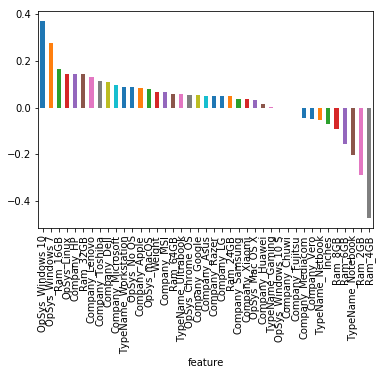

In [57]:
featureImportance = pd.DataFrame({"feature": data.drop('Price_euros',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

In [58]:
#Случайный лес

In [60]:
#Лес - 100 деревьев
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_forest = rf.predict(X_test)

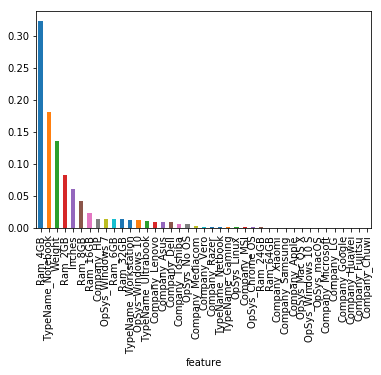

In [62]:
featureImportance = pd.DataFrame({"feature": data.drop('Price_euros',axis=1).columns, 
                                  "importance": rf.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

In [69]:
rf = RandomForestRegressor()
estimators = ('n_estimator')

In [70]:
print_metrics(y_test,y_pred_naive)

MAE: 1.0072162778717866
RMSE: 1.7041252112980618
R2: -0.00046176146612308955
MAPE: 100.00000000000453


In [71]:
print_metrics(y_test,y_pred_regr)

MAE: 0.5564099852848279
RMSE: 0.8968833015607081
R2: 0.7297490564372167
MAPE: 2898.796683159586


In [72]:
print_metrics(y_test,y_pred_forest)

MAE: 0.4693466633659806
RMSE: 0.7869858291867154
R2: 0.782164795688117
MAPE: 3532.7071312916614


In [ ]:
#Вывод: случайный лес - самая эффективная модель.

### Итого

С предобработкой немножко косяков, стоило технические переменные все же оставить, и еще шкалировать категории - не лучшая идея, а в целом ок

С модельками и метриками никаких нареканий, разные модели, хорошие визуализации и вот это вот всё :)